In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_full = pd.read_csv("data/full_data.csv", low_memory=False)
df_full

,index,Unnamed: 0,Date,Year,Month,Global Temperature Anomalies,Global Precipitation,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,...,SOI,Season (2-Month),MEI.ext,MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity,high,low
0,120,120,1960-01-01,1960,JAN,0.04,NaN,NaN,NaN,NaN,...,0.1,DJ,-0.070,NaN,DJF,-0.1,1960-1961,N,32.290323,17.432258
1,121,121,1960-02-01,1960,FEB,0.15,NaN,NaN,NaN,NaN,...,0.1,JF,0.073,NaN,JFM,-0.1,1960-1961,N,30.275862,14.055172
2,122,122,1960-03-01,1960,MAR,-0.24,NaN,NaN,NaN,NaN,...,1.0,FM,0.106,NaN,FMA,-0.1,1960-1961,N,31.645161,12.535484
3,123,123,1960-04-01,1960,APR,-0.11,NaN,NaN,NaN,NaN,...,0.8,MA,0.167,NaN,MAM,0.0,1960-1961,N,58.566667,37.913333
4,124,124,1960-05-01,1960,MAY,-0.07,NaN,NaN,NaN,NaN,...,0.5,AM,0.177,NaN,AMJ,0.0,1960-1961,N,65.548387,47.412903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,895,895,2024-08-01,2024,AUG,1.27,84.55,20.52,-0.34,24.97,...,0.9,JA,NaN,-0.73,JAS,-0.1,2024-2025,N,79.387097,61.129032
776,896,896,2024-09-01,2024,SEP,1.25,80.73,19.91,-0.68,24.85,...,-0.1,AS,NaN,-0.65,ASO,-0.2,2024-2025,N,76.833333,54.933333
777,897,897,2024-10-01,2024,OCT,1.33,84.96,20.55,-0.32,25.04,...,0.5,SO,NaN,-0.52,SON,-0.3,2024-2025,N,66.129032,42.651613
778,898,898,2024-11-01,2024,NOV,1.32,81.76,21.88,0.26,25.17,...,0.5,ON,NaN,-0.68,OND,-0.4,2024-2025,N,49.666667,37.733333


In [3]:
df = df_full[["Year","Month","Global Temperature Anomalies","ENSO Phase-Intensity","high","low"]]

In [4]:
df

,Year,Month,Global Temperature Anomalies,ENSO Phase-Intensity,high,low
0,1960,JAN,0.04,N,32.290323,17.432258
1,1960,FEB,0.15,N,30.275862,14.055172
2,1960,MAR,-0.24,N,31.645161,12.535484
3,1960,APR,-0.11,N,58.566667,37.913333
4,1960,MAY,-0.07,N,65.548387,47.412903
...,...,...,...,...,...,...
775,2024,AUG,1.27,N,79.387097,61.129032
776,2024,SEP,1.25,N,76.833333,54.933333
777,2024,OCT,1.33,N,66.129032,42.651613
778,2024,NOV,1.32,N,49.666667,37.733333


In [5]:
df["ENSO Phase-Intensity"].unique()

array(['N', 'ME', 'WL', 'SE', 'WE', 'ML', 'SL', 'VSE'], dtype=object)

In [6]:
# Encoding Enso 
enso_ordered = {
    "VSE": -4,  # Very Strong El Niño
    "SE":  -3,  # Strong El Niño
    "ME":  -2,  # Moderate El Niño
    "WE":  -1,  # Weak El Niño
    "N":    0,  # Neutral
    "WL":   1,  # Weak La Niña
    "ML":   2,  # Moderate La Niña
    "SL":   3   # Strong La Niña
}

# Apply mapping to your ENSO column
df.loc[:, "ENSO_encoded"] = df["ENSO Phase-Intensity"].map(enso_ordered)

/tmp/ipykernel_2181545/3211426647.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "ENSO_encoded"] = df["ENSO Phase-Intensity"].map(enso_ordered)


In [7]:
# Encoding Enso 
enso_ordered = {
    "VSE": -4,  # Very Strong El Niño
    "SE":  -3,  # Strong El Niño
    "ME":  -2,  # Moderate El Niño
    "WE":  -1,  # Weak El Niño
    "N":    0,  # Neutral
    "WL":   1,  # Weak La Niña
    "ML":   2,  # Moderate La Niña
    "SL":   3   # Strong La Niña
}

# Apply mapping to your ENSO column
df_full.loc[:, "ENSO_encoded"] = df_full["ENSO Phase-Intensity"].map(enso_ordered)

In [8]:
df_full.to_csv("data/full_data_encoded.csv", index=False)

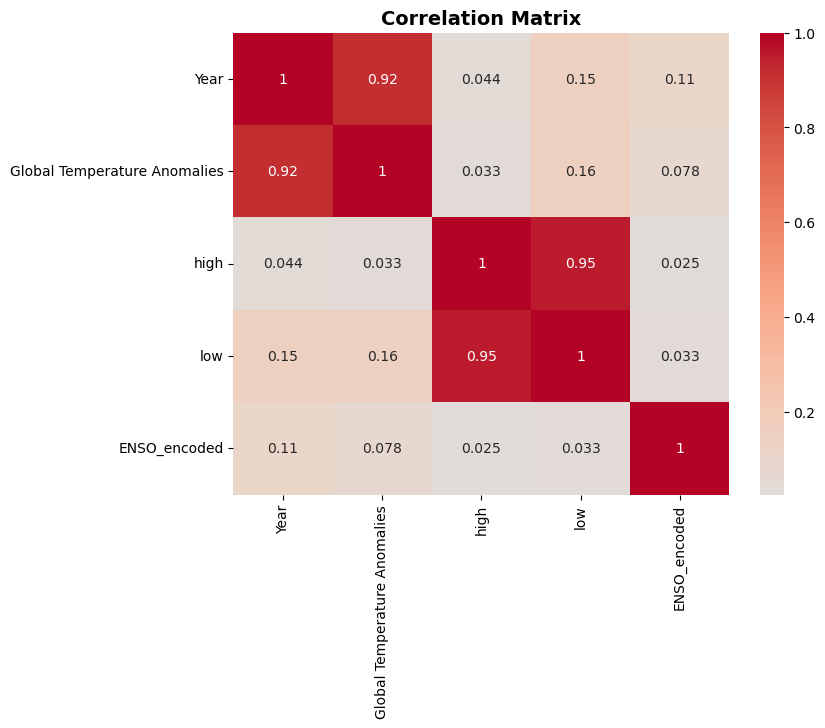

In [9]:
corr_matrix = df.corr(numeric_only=True)  # ensure only numeric columns

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix", fontsize=14, weight="bold")
plt.show()

In [10]:
df = pd.read_csv("data/full_data_encoded.csv", low_memory=False)

In [12]:
df["ENSO_encoded"].unique()

array([ 0, -2,  1, -3, -1,  2,  3, -4])